In [3]:
import joblib
from gensim.corpora import Dictionary
import gensim.corpora as corpora
from gensim.corpora import MmCorpus
from gensim import corpora, models, matutils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans, KMeans, Birch, DBSCAN

import pandas as pd

from sklearn.preprocessing import StandardScaler
import os

from time import time

from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline

from sklearn import metrics

from nltk.tokenize import TweetTokenizer



# Load LDA Model

In [4]:
corpus = MmCorpus("corpus.corp")
texts = joblib.load('texts.pkl')
fulltexts = joblib.load('fulltexts.pkl')
model_list_6 = joblib.load('model_list_6.pkl')
lda_model = model_list_6[6]
dictionary = Dictionary.load("dictionary.dict")

In [5]:
document_prob = [lda_model[doc][0] for doc in corpus]
document_prob

[[(0, 0.16790178), (1, 0.48818353), (4, 0.1224438), (5, 0.19746245)],
 [(0, 0.15314862), (1, 0.49682325), (4, 0.19643442), (5, 0.13300776)],
 [(0, 0.15793703), (1, 0.50353676), (4, 0.105472066), (5, 0.21030809)],
 [(0, 0.014349602),
  (1, 0.334381),
  (2, 0.01435082),
  (3, 0.0144610675),
  (4, 0.18714105),
  (5, 0.014374457),
  (6, 0.42094198)],
 [(0, 0.017953426),
  (1, 0.017926998),
  (2, 0.1892268),
  (3, 0.017924879),
  (4, 0.017959582),
  (5, 0.017930374),
  (6, 0.7210779)],
 [(0, 0.017947504),
  (1, 0.37150228),
  (2, 0.5387403),
  (3, 0.017956313),
  (4, 0.017942568),
  (5, 0.017990107),
  (6, 0.01792096)],
 [(0, 0.36704323),
  (1, 0.01112618),
  (2, 0.011003645),
  (3, 0.011029168),
  (4, 0.5777258),
  (5, 0.011015585),
  (6, 0.011056371)],
 [(0, 0.31381443),
  (1, 0.26488823),
  (2, 0.1615224),
  (4, 0.066788636),
  (5, 0.18151177)],
 [(0, 0.035721995),
  (1, 0.035720225),
  (2, 0.035720192),
  (3, 0.03572109),
  (4, 0.035862733),
  (5, 0.30828378),
  (6, 0.51297)],
 [(0, 0.1

In [6]:
document_prob_new = []
index = [x for x in range(0,7)]

for tweet in document_prob:
    index_tweet = []
    tweet_prob_new = []
    for tupla in tweet:
        index_tweet.append(tupla[0])
        tweet_prob_new.append(tupla)
        
    zero_values = np.array(np.setdiff1d(index, index_tweet))
    for i in zero_values:
        tweet_prob_new.append((i, 0.0))
    
    document_prob_new.append(tweet_prob_new)

for tweet in document_prob_new:
    tweet.sort(key=lambda x:x[0])

matrix = []
for tweet in document_prob_new:
    tweet_prob = []
    for value in tweet:
        tweet_prob.append(value[1])
    matrix.append(tweet_prob)

# Document - Matrix with 7 dimensions (probability assignament to each topic)  
matrix_np = np.array(matrix)

In [7]:
max_index = []
max_probability = []
for i in document_prob:
    probability = 0
    max_value = []
    index_max_value = []
    for prob in i:
        if (prob[1]>probability):
            index_max_value = prob[0]
            max_value = prob[1]
            probability = prob[1]
    max_index.append(index_max_value)
    max_probability.append(max_value)

df = pd.DataFrame(data=max_index, columns = ['dominant_topic'])
df2 = pd.DataFrame(data=max_probability, columns = ['maximum_probability'])

df['maximum_probability'] = df2   
df.head(10)
#joblib.dump(df, "df.pkl")
#joblib.dump(matrix_np, 'matrix_np.pkl')

['matrix_np.pkl']

In [8]:
len(df)

212400

# Words and tweets frequency

In [9]:
df_uber = pd.read_csv("../LDA/data/uber_support.csv")
df_uber.drop_duplicates(inplace=True, subset="tweet")

corpus = MmCorpus("corpus.corp")
texts = joblib.load('texts.pkl')
fulltexts = joblib.load('fulltexts.pkl')
model_list_6 = joblib.load('model_list_6.pkl')
lda_model = model_list_6[6]
dictionary = Dictionary.load("dictionary.dict")

df_uber['cleaned_texts_1'] = fulltexts
df_uber['length'] = df_uber['cleaned_texts_1'].str.len()
df_uber = df_uber[df_uber['length'] > 0] 
df_uber['cleaned_texts'] = texts
df_analyse = df_uber[['date','tweet', 'cleaned_texts_1', 'cleaned_texts', 'length']].reset_index()



df = pd.DataFrame(data=max_index, columns = ['dominant_topic'])
df2 = pd.DataFrame(data=max_probability, columns = ['maximum_probability'])


def tokenizeTweets (words):
    tokens = []
    #print(words)

    tknzr = TweetTokenizer()
    tokens = tknzr.tokenize(words)
    tokens = [w.lower() for w in tokens] 
    return tokens



texts = [tokenizeTweets(document) for document in df_analyse['tweet']]


df['maximum_probability'] = df2   
df['date'] = df_analyse['date']
df['tweet'] = df_analyse['tweet']
df['tweet_tokenized'] = texts
df['cleaned_texts'] = df_analyse['cleaned_texts']
#df['cleaned_texts_1'] = df_analyse['cleaned_texts_1']
df['length'] = df['tweet_tokenized'].str.len()
df['length_cleaned'] = df_analyse ['length']
joblib.dump(df, "df.pkl")
df


dominant_topic  maximum_probability                 date  \
0                    1             0.488184  2020-03-31 23:58:31   
1                    1             0.496823  2020-03-31 23:52:51   
2                    1             0.503537  2020-03-31 23:51:11   
3                    6             0.420942  2020-03-31 23:50:58   
4                    6             0.721078  2020-03-31 23:46:27   
...                ...                  ...                  ...   
212395               6             0.508567  2020-08-01 00:06:47   
212396               6             0.571329  2020-08-01 00:06:36   
212397               2             0.414570  2020-08-01 00:04:39   
212398               0             0.375545  2020-08-01 00:00:41   
212399               3             0.731724  2020-08-01 00:00:10   

                                                    tweet  \
0       @LauraKellyKS @KansasGOP why did @Uber_Support...   
1       @Uber_Support why did @Uber_Support and uber  ...   
2       why did @Uber_Support @Uber not follow thru wi...   
3       Same song and dance @Uber @Uber_Support @dkhos...   
4       @Uber_Support Hey, I'm receiving ride reports ...   
...                                                   ...   
212395      @Uber_Support need help asap on current order   
212396           @Uber_Support Nothing got resolved  🤷‍♀️   
212397  @Uber_Support @Tesla 2 trips in a row now as I...   
212398  after @Uber_Support card changed, they did not...   
212399  @Uber_Support How is UberEats "Not available i...   

                                          tweet_tokenized  \
0       [@laurakellyks, @kansasgop, why, did, @uber_su...   
1       [@uber_support, why, did, @uber_support, and, ...   
2       [why, did, @uber_support, @uber, not, follow, ...   
3       [same, song, and, dance, @uber, @uber_support,...   
4       [@uber_support, hey, ,, i'm, receiving, ride, ...   
...                                                   ...   
212395  [@uber_support, need, help, asap, on, current,...   
212396  [@uber_support, nothing, got, resolved, 🤷, ‍, ...   
212397  [@uber_support, @tesla, 2, trips, in, a, row, ...   
212398  [after, @uber_support, card, changed, ,, they,...   
212399  [@uber_support, how, is, ubereats, ", not, ava...   

                                            cleaned_texts  length  \
0       [follow, promis, disinfect, materi, driver, ca...      47   
1       [uber, follow, thru, promis, disinfect, materi...      49   
2       [follow, promis, disinfect, materi, driver, ca...      47   
3       [song, danc, dead, wrong, handl, pandem, pligh...      31   
4       [receiv, ride, report, email, even, account, guy]      21   
...                                                   ...     ...   
212395                 [need, help, asap, current, order]       7   
212396                                           [resolv]       8   
212397  [trip, row, slide, end, trip, button, trip, po...      41   
212398  [card, chang, provid, realli, cool, incent, ca...      43   
212399  [ubereat, avail, area, order, last_night, year...      30   

        length_cleaned  
0                   17  
1                   20  
2                   18  
3                    9  
4                    7  
...                ...  
212395               5  
212396               1  
212397              15  
212398              18  
212399               7  

[212400 rows x 8 columns]

In [85]:
labels = df['dominant_topic'].tolist()
lengths = df['length'].tolist()

#total_length = [0 for _ in range(0,7)]
counter_docs = [0 for _ in range(0,7)]

topic_lenght_mean = []

for i in range(0,7):
    counter = 0
    total_length = 0
    for ind, value in enumerate(labels):
        if(value == i):
            counter = counter + 1 
            total_length = total_length + lengths[ind]
            counter_docs[i] = counter_docs[i] + 1
    
    topic_mean = int(total_length/counter)
    topic_lenght_mean.append(topic_mean)
    
print("Numero total de palabras por tema {}".format(topic_lenght_mean))
print("numero total de documentos por tema {}".format(counter_docs))

Numero total de palabras por tema [29, 30, 32, 33, 29, 34, 23]
numero total de documentos por tema [33277, 25681, 21088, 26294, 37506, 20330, 48224]


In [7]:
# Sabemos que K = 7 por varios modelos ==> Vamos a intentar optimizar los clusteres

In [8]:
#1ª Prueba: Comparamos las etiquetas creadas de LDA con las etiquetas de Kmeans y vamos bajando de 0.1 en 0.1 la probabilidad de LDA para dar una etiqueta más. Al final llegaremos a 0.1 de probabilidad de LDA
# Todos los documentos estarán asignados (ya que probabilidad min es > 0.1428 porque son 7dimensiones en cada documento)

# LABELING

In [9]:
def merge(list1, list2): 
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
    return merged_list 

In [10]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(matrix_np)
labels = kmeans.labels_

## Document probability ranges

In [11]:
mutual_info_score = []
rand_score = []
homogeneity = []
v_score = []
completeness = []
fowlkes = []
length = []

probabilities = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
for prob in probabilities:
    print(prob)
    df1 = df.loc[(df['maximum_probability']>prob)][:]
    index = df1.index.values.tolist()
    topic = df1.dominant_topic.values.tolist()
    theme = merge(index, topic)
    
    labels_true = []
    for value in theme:
        labels_true.append(value[1])
    
    labels_pred = []
    for i, label in enumerate(labels):
        for value in theme:
            if (value[0] == i):
                labels_pred.append(label)
                break
                
    print(len(labels_true))
    print(len(labels_pred))
    
    mutual_info_score.append(metrics.adjusted_mutual_info_score(labels_true, labels_pred))
    homogeneity.append(metrics.homogeneity_score(labels_true, labels_pred))
    v_score.append(metrics.v_measure_score(labels_true, labels_pred)) #BETA = 1
    completeness.append(metrics.completeness_score(labels_true, labels_pred))
    fowlkes.append(metrics.fowlkes_mallows_score(labels_true, labels_pred))
    length.append(len(labels_pred))

0.9
4562
4562
0.8
21450
21450
0.7
53516
53516
0.6
79629
79629
0.5
133403
133403
0.4
179497
179497
0.3
208209
208209
0.2
212381
212381
0.1
212400
212400


# Plot results

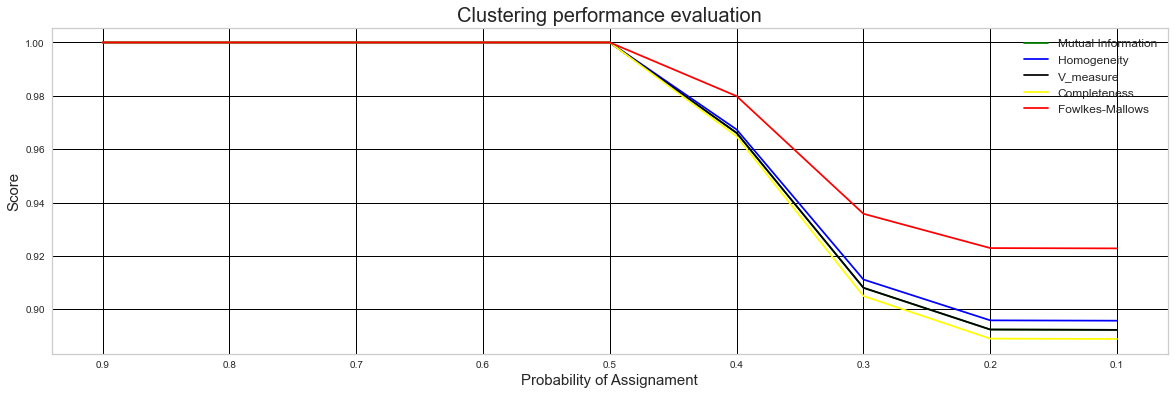

In [12]:
x_values = np.arange(0.1, 1, 0.1)
x = x_values[::-1]


plt.figure(figsize=(20,6))

plt.plot(x, mutual_info_score, 'green', label = 'Mutual Information')
plt.plot(x, homogeneity, 'blue', label = 'Homogeneity')
plt.plot(x, v_score, 'black', label = 'V_measure')
plt.plot(x, completeness, 'yellow', label = 'Completeness')
plt.plot(x, fowlkes, 'red', label = 'Fowlkes-Mallows')
plt.gca().invert_xaxis()

plt.grid(True,color='black')
plt.xlabel("Probability of Assignament", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.title('Clustering performance evaluation', fontsize=20)
leg = plt.legend(loc='best', fontsize=12);
plt.show()



In [13]:
path = "./results/Labels/sucessive"
try:
    if not os.path.isdir(path):
        os.makedirs(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Successfully created the directory ./results/Labels/sucessive 


In [14]:
joblib.dump(mutual_info_score, "./results/Labels/sucessive/mutual_info_score.pkl")
joblib.dump(homogeneity, "./results/Labels/sucessive/homogeneity.pkl")
joblib.dump(v_score, "./results/Labels/sucessive/v_score.pkl")
joblib.dump(completeness, "./results/Labels/sucessive/completeness.pkl")
joblib.dump(fowlkes, "./results/Labels/sucessive/fowlkes.pkl")

['./results/Labels/sucessive/fowlkes.pkl']

# LABELING

In [ ]:
# 2ª Prueba: Comparamos las etiquetas que da kmeans con la probabilidad de asignación de documentos (comparamos la etiqueta que da LDA con Kmeans para cada intervalo 0.9-0.8....0.2-0.1)

In [15]:
mutual_info_score = []
rand_score = []
homogeneity = []
v_score = []
completeness = []
fowlkes = []
length = []

probabilities = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

for maximum_prob in probabilities:
    minimum_prob = round(maximum_prob - 0.1, 2)
    df1 = df[(df['maximum_probability'] <= maximum_prob) & (df['maximum_probability'] > minimum_prob)]
    index = df1.index.values.tolist()
    topic = df1.dominant_topic.values.tolist()
    theme = merge(index, topic)
    
    labels_true = []
    for value in theme:
        labels_true.append(value[1])
    
    labels_pred = []
    for i, label in enumerate(labels):
        for value in theme:
            if (value[0] == i):
                #print("index{}".format(i))
                #print(label)
                labels_pred.append(label)
                break
                
    print(len(labels_true))
    print(len(labels_pred))
    
    # Append metrics
    mutual_info_score.append(metrics.adjusted_mutual_info_score(labels_true, labels_pred))
    homogeneity.append(metrics.homogeneity_score(labels_true, labels_pred))
    v_score.append(metrics.v_measure_score(labels_true, labels_pred)) #BETA = 1
    completeness.append(metrics.completeness_score(labels_true, labels_pred))
    fowlkes.append(metrics.fowlkes_mallows_score(labels_true, labels_pred))
    length.append(len(labels_pred))


4562
4562
16888
16888
32066
32066
26113
26113
53774
53774
46094
46094
28712
28712
4172
4172
19
19


# Plot results

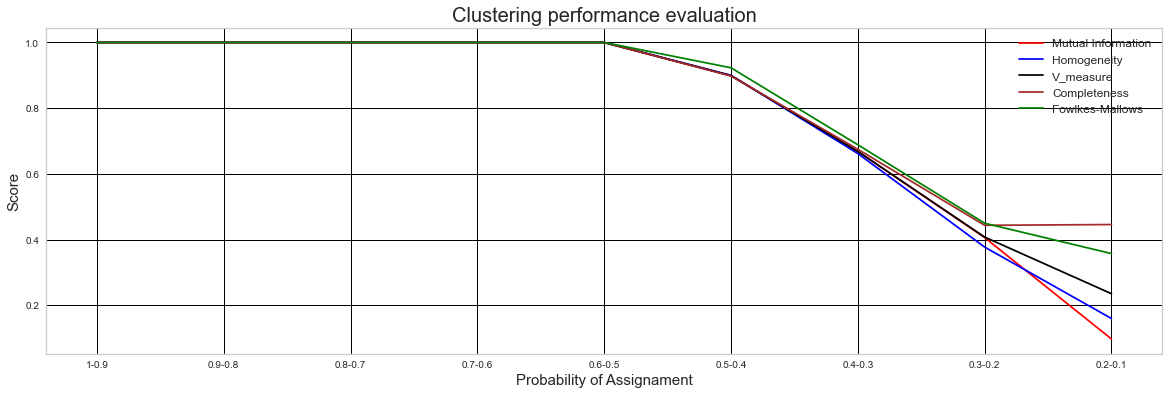

In [16]:
x = ['1-0.9','0.9-0.8','0.8-0.7','0.7-0.6','0.6-0.5','0.5-0.4','0.4-0.3','0.3-0.2','0.2-0.1']
#x = x_values[::-1]


plt.figure(figsize=(20,6))

plt.plot(x, mutual_info_score, 'red', label = 'Mutual Information')
plt.plot(x, homogeneity, 'blue', label = 'Homogeneity')
plt.plot(x, v_score, 'black', label = 'V_measure')
plt.plot(x, completeness, 'brown', label = 'Completeness')
plt.plot(x, fowlkes, 'green', label = 'Fowlkes-Mallows')
#plt.gca().invert_xaxis()

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)


plt.grid(True,color='black')
plt.xlabel("Probability of Assignament", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.title('Clustering performance evaluation', fontsize=20)
leg = plt.legend(loc='best', fontsize=12);
plt.show()

In [17]:
#plt.figure(figsize=(40,10))

#N = 9

#ind = np.arange(N) 
#width = 0.15  

#plt.bar(ind, mutual_info_score, width, color='green', label = 'Mutual Information')
#plt.bar(ind + width, homogeneity, width, color='blue', label = 'Homogeneity')
#plt.bar(ind + width*2 , v_score, width, color='black', label = 'V_measure')
#plt.bar(ind + width*3, completeness, width, color='yellow', label = 'Completeness')
#plt.bar(ind + width*4, fowlkes, width, color='red', label = 'Fowlkes-Mallows')

#plt.ylabel('Scores', fontsize=25)
#plt.title('Clustering performance evaluation', fontsize=30)
#plt.yticks(fontsize=20)
#plt.xticks(ind + width*4 / 2, ('1-0.9', '0.9-0.8', '0.8-0.7', '0.7-0.6', '0.6-0.5','0.5-0.4' , '0.4-0.3', '0.3-0.2', '0.2-0.1'), fontsize=20)
#plt.legend(loc='best', fontsize=20)
#plt.grid()
#plt.show()




In [18]:
path = "./results/Labels/partial"
try:
    if not os.path.isdir(path):
        os.makedirs(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Successfully created the directory ./results/Labels/partial 


In [19]:
joblib.dump(mutual_info_score, "./results/Labels/partial/mutual_info_score.pkl")
joblib.dump(homogeneity, "./results/Labels/partial/homogeneity.pkl")
joblib.dump(v_score, "./results/Labels/partial/v_score.pkl")
joblib.dump(completeness, "./results/Labels/partial/completeness.pkl")
joblib.dump(fowlkes, "./results/Labels/partial/fowlkes.pkl")

['./results/Labels/partial/fowlkes.pkl']

In [20]:
probs = ['1-0.9','0.9-0.8','0.8-0.7','0.7-0.6','0.6-0.5','0.5-0.4','0.4-0.3','0.3-0.2','0.2-0.1']
df_res = pd.DataFrame(data=probs, 
                      columns=["Maximum probability"])

array_to_df = []
array_to_df.append(mutual_info_score)
array_to_df.append(homogeneity)
array_to_df.append(v_score)
array_to_df.append(completeness)
array_to_df.append(fowlkes)
array_to_df.append(length)


df_res["mutual_info_score"] = array_to_df[0]
df_res["homogeneity"] = array_to_df[1]
df_res["v_score"] = array_to_df[2]
df_res["completeness"] = array_to_df[3]
df_res["fowlkes"] = array_to_df[4]
df_res["length"] = array_to_df[5]
df_res.to_csv('./results/Labels/partial/df_prob.csv', index=False)
df_res = pd.read_csv('./results/Labels/partial/df_prob.csv')
df_res

Maximum probability  mutual_info_score  homogeneity   v_score  completeness  \
0               1-0.9           1.000000     1.000000  1.000000      1.000000   
1             0.9-0.8           1.000000     1.000000  1.000000      1.000000   
2             0.8-0.7           1.000000     1.000000  1.000000      1.000000   
3             0.7-0.6           1.000000     1.000000  1.000000      1.000000   
4             0.6-0.5           1.000000     1.000000  1.000000      1.000000   
5             0.5-0.4           0.898899     0.899999  0.898920      0.897843   
6             0.4-0.3           0.668281     0.661922  0.668389      0.674984   
7             0.3-0.2           0.406245     0.377223  0.407685      0.443499   
8             0.2-0.1           0.097529     0.159775  0.235244      0.445824   

    fowlkes  length  
0  1.000000    4562  
1  1.000000   16888  
2  1.000000   32066  
3  1.000000   26113  
4  1.000000   53774  
5  0.922890   46094  
6  0.688650   28712  
7  0.449798    4172  
8  0.357428      19

# Theme labeling

In [ ]:
#3ª Prueba. Como prueba 2 pero para cada uno de los topics (rangos de 0.1-0.1). SOLO COMPARAMOS HOMOGENEITY

In [21]:
mutual_info_score = []
rand_score = []
homogeneity = []
v_score = []
completeness = []
fowlkes = []
length = []

topics = range(0,7)
#probabilities = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

for topic_number in topics:
    mutual_info_score = []
    length = []
    probabilities = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
    
    for maximum_prob in probabilities:
        
        minimum_prob = round(maximum_prob - 0.1, 2)
        df1 = df[(df['maximum_probability'] <= maximum_prob) & (df['maximum_probability'] > minimum_prob) & (df['dominant_topic'] == topic_number)]
        index = df1.index.values.tolist()
        topic = df1.dominant_topic.values.tolist()
        theme = merge(index, topic)
        labels_true = []
        for value in theme:
            labels_true.append(value[1])
    
        labels_pred = []
        for i, label in enumerate(labels):
            for value in theme:
                if (value[0] == i):
                    #print("index{}".format(i))
                    #print(label)
                    labels_pred.append(label)
                    break

            
        print(len(labels_true))
        print(len(labels_pred))
        mutual_info_score.append(metrics.adjusted_mutual_info_score(labels_true, labels_pred))
        length.append(len(labels_pred))
        
    path = "./results/Labels/partial/topic{}".format(topic_number)
    
    try:
        if not os.path.isdir(path):
            os.makedirs(path)
    except OSError:
        print ("Creation of the directory %s failed" % path)
    else:
        print ("Successfully created the directory %s " % path)

    joblib.dump(mutual_info_score, "./results/Labels/partial/topic{}/mutual_info_score.pkl".format(topic_number))
    

    probs = ['1-0.9','0.9-0.8','0.8-0.7','0.7-0.6','0.6-0.5','0.5-0.4','0.4-0.3','0.3-0.2','0.2-0.1']
    df_res = pd.DataFrame(data=probs, 
                          columns=["Maximum probability"])

    array_to_df = []
    array_to_df.append(mutual_info_score)
    array_to_df.append(length)


    df_res["mutual_info_score"] = array_to_df[0]
    df_res["length"] = array_to_df[1]

    df_res.to_csv('./results/Labels/partial/topic{}/df_prob.csv'.format(topic_number), index=False)
    df_res = pd.read_csv('./results/Labels/partial/topic{}/df_prob.csv'.format(topic_number))


1106
1106
3012
3012
4970
4970
4420
4420
8390
8390
6840
6840
3975
3975
559
559
5
5
Successfully created the directory ./results/Labels/partial/topic0 
151
151
1057
1057
2827
2827
2751
2751
6699
6699
6720
6720
4724
4724
749
749
3
3
Successfully created the directory ./results/Labels/partial/topic1 
286
286
1084
1084
2278
2278
2618
2618
5613
5613
5100
5100
3545
3545
563
563
1
1
Successfully created the directory ./results/Labels/partial/topic2 
826
826
2190
2190
3187
3187
3724
3724
6270
6270
6062
6062
3528
3528
506
506
1
1
Successfully created the directory ./results/Labels/partial/topic3 
729
729
3051
3051
5528
5528
4869
4869
9493
9493
8348
8348
4822
4822
666
666
0
0
Successfully created the directory ./results/Labels/partial/topic4 
372
372
985
985
2030
2030
2418
2418
5013
5013
5288
5288
3651
3651
570
570
3
3
Successfully created the directory ./results/Labels/partial/topic5 
1092
1092
5509
5509
11246
11246
5313
5313
12296
12296
7736
7736
4467
4467
559
559
6
6
Successfully created the d

In [23]:
## Load dataframes

In [24]:
for topic_number in range(0,7):
    data = pd.read_csv('./results/Labels/partial/topic{}/df_prob.csv'.format(topic_number)) 

In [25]:
total_mutual_info = []
total_length = []
for topic_number in range(0,7):
    data = pd.read_csv('./results/Labels/partial/topic{}/df_prob.csv'.format(topic_number)) 
    mutual_info = data.mutual_info_score.values.tolist()
    length = data.length.values.tolist()
    total_mutual_info.append(mutual_info)
    total_length.append(length)


In [26]:
## Plot results

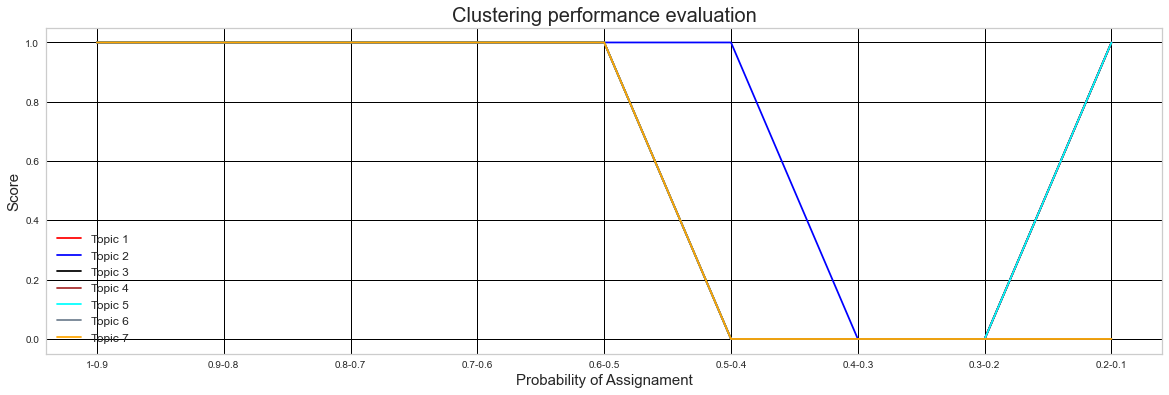

In [27]:
x = ['1-0.9','0.9-0.8','0.8-0.7','0.7-0.6','0.6-0.5','0.5-0.4','0.4-0.3','0.3-0.2','0.2-0.1']
#x = x_values[::-1]


plt.figure(figsize=(20,6))

plt.plot(x, total_mutual_info[0], 'red', label = 'Topic 1')
plt.plot(x, total_mutual_info[1], 'blue', label = 'Topic 2')
plt.plot(x, total_mutual_info[2], 'black', label = 'Topic 3')
plt.plot(x, total_mutual_info[3], 'brown', label = 'Topic 4')
plt.plot(x, total_mutual_info[4], 'aqua', label = 'Topic 5')
plt.plot(x, total_mutual_info[5], 'slategray', label = 'Topic 6')
plt.plot(x, total_mutual_info[6], 'orange', label = 'Topic 7')

#plt.gca().invert_xaxis()

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)


plt.grid(True,color='black')
plt.xlabel("Probability of Assignament", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.title('Clustering performance evaluation', fontsize=20)
leg = plt.legend(loc='best', fontsize=12);
plt.show()

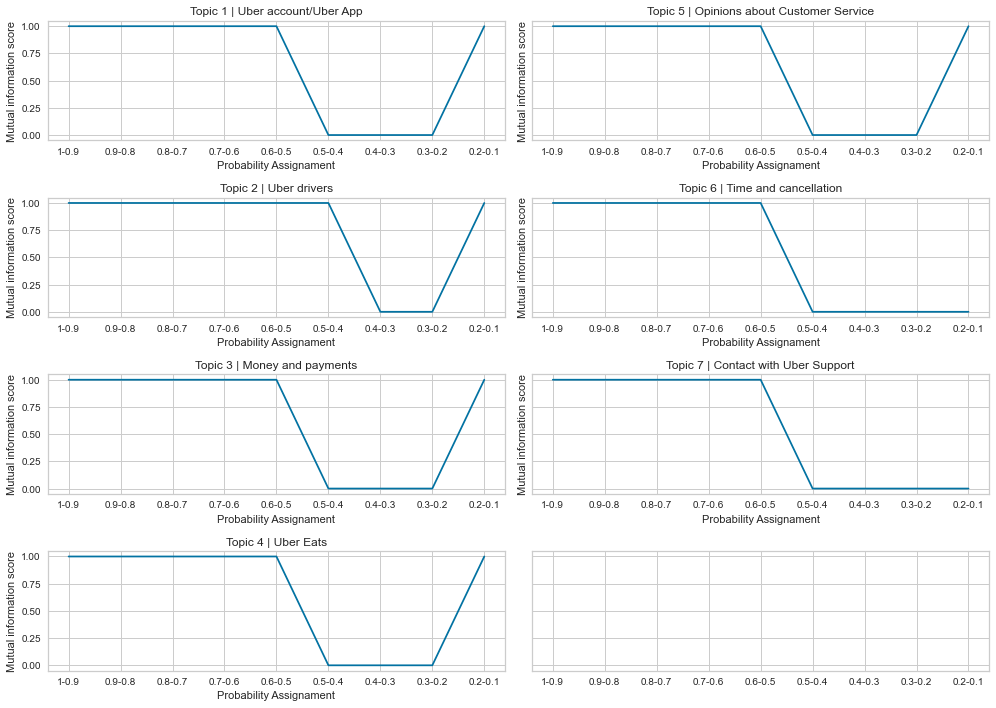

In [28]:
#https://towardsdatascience.com/master-the-art-of-subplots-in-python-45f7884f3d2e

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 10),
                         sharey='row', sharex='row')

x = ['1-0.9','0.9-0.8','0.8-0.7','0.7-0.6','0.6-0.5','0.5-0.4','0.4-0.3','0.3-0.2','0.2-0.1']

axes[0, 0].title.set_text('Topic 1 | Uber account/Uber App', )
axes[0, 0].set_xlabel('Probability Assignament')
axes[0, 0].set_ylabel('Mutual information score')
axes[0, 0].plot(x, total_mutual_info[0])

axes[1, 0].title.set_text('Topic 2 | Uber drivers')
axes[1, 0].set_xlabel('Probability Assignament')
axes[1, 0].set_ylabel('Mutual information score')
axes[1, 0].plot(x, total_mutual_info[1])

axes[2, 0].title.set_text('Topic 3 | Money and payments')
axes[2, 0].set_xlabel('Probability Assignament')
axes[2, 0].set_ylabel('Mutual information score')
axes[2, 0].plot(x, total_mutual_info[2])

axes[3, 0].title.set_text('Topic 4 | Uber Eats')
axes[3, 0].set_xlabel('Probability Assignament')
axes[3, 0].set_ylabel('Mutual information score')
axes[3, 0].plot(x, total_mutual_info[3])

axes[0, 1].title.set_text('Topic 5 | Opinions about Customer Service')
axes[0, 1].set_xlabel('Probability Assignament')
axes[0, 1].set_ylabel('Mutual information score')
axes[0, 1].plot(x, total_mutual_info[4])

axes[1, 1].title.set_text('Topic 6 | Time and cancellation')
axes[1, 1].set_xlabel('Probability Assignament')
axes[1, 1].set_ylabel('Mutual information score')
axes[1, 1].plot(x, total_mutual_info[5])

axes[2, 1].title.set_text('Topic 7 | Contact with Uber Support')
axes[2, 1].set_xlabel('Probability Assignament')
axes[2, 1].set_ylabel('Mutual information score')
axes[2, 1].plot(x, total_mutual_info[6])

fig.tight_layout()

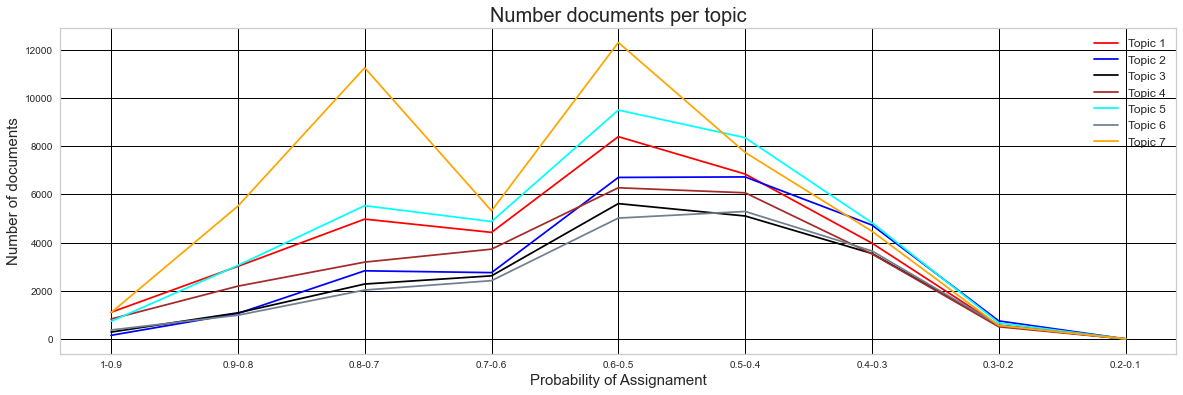

In [29]:
x = ['1-0.9','0.9-0.8','0.8-0.7','0.7-0.6','0.6-0.5','0.5-0.4','0.4-0.3','0.3-0.2','0.2-0.1']
#x = x_values[::-1]


plt.figure(figsize=(20,6))

plt.plot(x, total_length[0], 'red', label = 'Topic 1')
plt.plot(x, total_length[1], 'blue', label = 'Topic 2')
plt.plot(x, total_length[2], 'black', label = 'Topic 3')
plt.plot(x, total_length[3], 'brown', label = 'Topic 4')
plt.plot(x, total_length[4], 'aqua', label = 'Topic 5')
plt.plot(x, total_length[5], 'slategray', label = 'Topic 6')
plt.plot(x, total_length[6], 'orange', label = 'Topic 7')

#plt.gca().invert_xaxis()

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)


plt.grid(True,color='black')
plt.xlabel("Probability of Assignament", fontsize=15)
plt.ylabel("Number of documents", fontsize=15)
plt.title('Number documents per topic', fontsize=20)
leg = plt.legend(loc='best', fontsize=12);
plt.show()